In [104]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.base import clone
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# RUN MODELS

### This notebook serves as a one stop shop for our models. Get all evaluation metrics in one place. 

# Import Data

Current Training Data includes SPF survey responses and price for specific items


In [379]:
data = pd.read_csv("../data/CleanData/fullData.csv")#,index_col=0) 
data

,YEAR FORECAST MADE,QUARTER,YEAR BEING FORECAST,INDICATOR,FORECASTER ID,INDUSTRY,Year.ID.ForecastYear.Quarter,Indicator.Year.ID.ForecastYear.Quarter,BIN 1,BIN 2,...,pred_var,banana,beef,bread,chicken,eggs,electricity,flour,iceCream,unleadedGasoline
0,1992,1,1992,RealGDP,20,2,1992-20-1992-1,RealGDP-1992-20-1992-1,0.0,0.0,...,0.250000,0.479333,1.577667,0.734333,0.862000,0.888,0.085000,0.241333,2.605000,1.061667
1,1992,1,1992,RealGDP,30,3,1992-30-1992-1,RealGDP-1992-30-1992-1,0.0,0.0,...,0.360000,0.479333,1.577667,0.734333,0.862000,0.888,0.085000,0.241333,2.605000,1.061667
2,1992,1,1992,RealGDP,35,2,1992-35-1992-1,RealGDP-1992-35-1992-1,0.0,0.0,...,1.240000,0.479333,1.577667,0.734333,0.862000,0.888,0.085000,0.241333,2.605000,1.061667
3,1992,1,1992,RealGDP,40,2,1992-40-1992-1,RealGDP-1992-40-1992-1,NaN,NaN,...,NaN,0.479333,1.577667,0.734333,0.862000,0.888,0.085000,0.241333,2.605000,1.061667
4,1992,1,1992,RealGDP,60,2,1992-60-1992-1,RealGDP-1992-60-1992-1,0.0,0.0,...,0.427500,0.479333,1.577667,0.734333,0.862000,0.888,0.085000,0.241333,2.605000,1.061667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31041,2021,2,2024,Unemployment,586,2,2024-586-2021-2,Unemployment-2024-586-2021-2,NaN,NaN,...,NaN,0.599667,4.184667,1.510333,1.491667,1.629,0.140333,0.410667,4.849667,2.988333
31042,2021,2,2024,Unemployment,587,2,2024-587-2021-2,Unemployment-2024-587-2021-2,0.0,0.0,...,0.203125,0.599667,4.184667,1.510333,1.491667,1.629,0.140333,0.410667,4.849667,2.988333
31043,2021,2,2024,Unemployment,588,1,2024-588-2021-2,Unemployment-2024-588-2021-2,NaN,NaN,...,NaN,0.599667,4.184667,1.510333,1.491667,1.629,0.140333,0.410667,4.849667,2.988333
31044,2021,2,2024,Unemployment,589,2,2024-589-2021-2,Unemployment-2024-589-2021-2,0.0,0.0,...,0.050625,0.599667,4.184667,1.510333,1.491667,1.629,0.140333,0.410667,4.849667,2.988333



# Train Val Test Split (0.6,0.2,0.2)

## And save as csv (actually do we really need to)

In [380]:
# relevant=data[data["YEAR FORECAST MADE"]>=1984].drop(columns = ['YEAR FORECAST MADE', 'QUARTER', 'INDUSTRY', 'Year.ID.ForecastYear.Quarter',
#        'Indicator.Year.ID.ForecastYear.Quarter', 'BIN 1', 'BIN 2', 'BIN 3',
#        'BIN 4', 'BIN 5', 'BIN 6', 'BIN 7', 'BIN 8', 'BIN 9', 'BIN 10',
#        'BIN 11', 'BIN 1 prob',
#        'BIN 2 prob', 'BIN 3 prob', 'BIN 4 prob', 'BIN 5 prob', 'BIN 6 prob',
#        'BIN 7 prob', 'BIN 8 prob', 'BIN 9 prob', 'BIN 10 prob', 'BIN 11 prob',
#        'BIN 1 midpoint', 'BIN 2 midpoint', 'BIN 3 midpoint', 'BIN 4 midpoint',
#        'BIN 5 midpoint', 'BIN 6 midpoint', 'BIN 7 midpoint', 'BIN 8 midpoint',
#        'BIN 9 midpoint', 'BIN 10 midpoint', 'BIN 11 midpoint','nbin', 'bin_value_sum', 'TDIST',
#        'ACTUAL_BIN', 'NUM_OF_MAX',"FORECASTER ID"])
# relevant.dropna(inplace=True)

In [384]:
relevant = data[data["YEAR FORECAST MADE"]>=1992][["YEAR FORECAST MADE",'YEAR BEING FORECAST', 'INDICATOR', 'actual', 'MAX', 'pred_average', 'pred_var', 'banana', 'beef', 'bread', 'chicken',
        'eggs', 'electricity', 'flour', 'iceCream',
       'unleadedGasoline']]


In [385]:
predict_set = relevant[relevant["YEAR BEING FORECAST"]>2021]

In [386]:
predict_set

,YEAR FORECAST MADE,YEAR BEING FORECAST,INDICATOR,actual,MAX,pred_average,pred_var,banana,beef,bread,chicken,eggs,electricity,flour,iceCream,unleadedGasoline
26890,2019,2022,RealGDP,NaN,NaN,NaN,NaN,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
26891,2019,2022,RealGDP,NaN,0.35,1.800,1.010000,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
26892,2019,2022,RealGDP,NaN,NaN,NaN,NaN,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
26893,2019,2022,RealGDP,NaN,NaN,NaN,NaN,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
26894,2019,2022,RealGDP,NaN,NaN,NaN,NaN,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31041,2021,2024,Unemployment,NaN,NaN,NaN,NaN,0.599667,4.184667,1.510333,1.491667,1.629000,0.140333,0.410667,4.849667,2.988333
31042,2021,2024,Unemployment,NaN,0.50,5.125,0.203125,0.599667,4.184667,1.510333,1.491667,1.629000,0.140333,0.410667,4.849667,2.988333
31043,2021,2024,Unemployment,NaN,NaN,NaN,NaN,0.599667,4.184667,1.510333,1.491667,1.629000,0.140333,0.410667,4.849667,2.988333
31044,2021,2024,Unemployment,NaN,0.90,5.175,0.050625,0.599667,4.184667,1.510333,1.491667,1.629000,0.140333,0.410667,4.849667,2.988333


In [387]:
predict_set.drop(columns=["actual"])

,YEAR FORECAST MADE,YEAR BEING FORECAST,INDICATOR,MAX,pred_average,pred_var,banana,beef,bread,chicken,eggs,electricity,flour,iceCream,unleadedGasoline
26890,2019,2022,RealGDP,NaN,NaN,NaN,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
26891,2019,2022,RealGDP,0.35,1.800,1.010000,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
26892,2019,2022,RealGDP,NaN,NaN,NaN,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
26893,2019,2022,RealGDP,NaN,NaN,NaN,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
26894,2019,2022,RealGDP,NaN,NaN,NaN,0.576000,3.761333,1.272333,1.475667,1.551667,0.135333,0.442333,4.894667,2.402000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31041,2021,2024,Unemployment,NaN,NaN,NaN,0.599667,4.184667,1.510333,1.491667,1.629000,0.140333,0.410667,4.849667,2.988333
31042,2021,2024,Unemployment,0.50,5.125,0.203125,0.599667,4.184667,1.510333,1.491667,1.629000,0.140333,0.410667,4.849667,2.988333
31043,2021,2024,Unemployment,NaN,NaN,NaN,0.599667,4.184667,1.510333,1.491667,1.629000,0.140333,0.410667,4.849667,2.988333
31044,2021,2024,Unemployment,0.90,5.175,0.050625,0.599667,4.184667,1.510333,1.491667,1.629000,0.140333,0.410667,4.849667,2.988333


In [388]:
relevant = relevant[relevant["YEAR BEING FORECAST"]<=2021]

In [389]:
relevant.dropna(inplace=True)

In [390]:
train,test = train_test_split(relevant,test_size=.2,random_state=42,stratify=relevant["INDICATOR"])

In [391]:
train,val = train_test_split(train,test_size=0.25, random_state=42,stratify = train["INDICATOR"])

In [392]:
# train.to_csv("../data/TrainingData/shuffled_train.csv",index=False)
# test.to_csv("../data/TestData/shuffled_test.csv",index=False)
# val.to_csv("../data/ValidationData/val.csv",index=False)

# Model Creation

Current Regression Models: XGBoost and RandomForestRegressor
Past Regression Models: LinearRegression, KNN,

In [358]:
# train=pd.read_csv("../data/TrainingData/shuffled_train.csv")
# test=pd.read_csv("../data/TestData/shuffled_test.csv")
# val=pd.read_csv("../data/ValidationData/val.csv")

In [394]:
def MeasureSplit(df,measure):
    return df[df["INDICATOR"]==measure].drop(columns = ["actual","INDICATOR","YEAR BEING FORECAST","YEAR FORECAST MADE"]),df[df["INDICATOR"]==measure]["actual"]

In [395]:
class RegressionModel:
    measures = ["Unemployment","RealGDP","Core CPI","Core PCE"]
    
    def __init__(self,name,model):
        self.years = None
        self.name = name
        self.model = model
        self.fitted_models = dict.fromkeys(self.measures,None)
        self.rmse_scores = []
        self.optimized_rmse_scores = []
        self.optimized_r2_scores = []
        self.r2_scores = []
        self.validation = True
        self.best_models = dict.fromkeys(self.measures,None)
        self.optimized=False
        self.store_scores()  
    
    def set_validation(setting):
        self.validation=setting
        
    def clear_scores(self):
        self.rmse_scores = []
        self.r2_scores = []
        
    def store_scores(self):
        if self.optimized==True:
            rmse = self.optimized_rmse_scores
            r2 = self.optimized_r2_scores
        else:
            rmse = self.rmse_scores
            r2 = self.r2_scores
        for measure in self.measures:
            if self.validation:
                X_test,y_test = MeasureSplit(val,measure)
            else: 
                X_test,y_test = MeasureSplit(test,measure)
            predictions = self.get_predictions(measure) 
            rmse.append(np.sqrt(np.mean((y_test-predictions)**2)))
            r2.append(r2_score(y_test,predictions))
        return 
    
    def plot_scores(self):
        fig,axes = plt.subplots(2,1,figsize=(10,20))
        for i,score,s in zip([0,1],['RMSE Scores','R^2 Scores'],[self.rmse_scores,self.r2_scores]):
            sns.barplot(x=self.measures,y=s,ax=axes[i])
            axes[i].set_title(score)
            axes[i].set_xlabel("Economic Measures")
            axes[i].set_ylabel("Score")
        return plt.show()
    
    def get_predictions(self,variable_name):
        assert variable_name in self.measures
        #returns predictions for specified measure
        if self.optimized==True:
            model = self.best_models[variable_name]
        elif self.fitted_models[self.measures[3]] == None:
            model = clone(self.model)
        else:
            model = self.fitted_models[variable_name]
        print(model)
        X_train,y_train = MeasureSplit(train,variable_name)
        if self.validation:
            X_test,y_test = MeasureSplit(val,variable_name)
        else: 
            X_test,y_test = MeasureSplit(test,variable_name)
        model.fit(X_train,y_train)
        if self.optimized == False:
            self.fitted_models[variable_name] = model
        return model.predict(X_test)
    
    def create_results(self):
        data = {}
        for measure in self.measures:
            data[measure] = self.get_predictions(measure)
        return pd.DataFrame(dict([ (self.name+" "+k,pd.Series(v)) for k,v in data.items()]))
    
    def annual_performance(self, variable_name, plot=True):
        assert variable_name in self.measures
        preds = self.get_predictions(variable_name)
        actuals = val[val["INDICATOR"]==variable_name]['actual']
        spf_preds = val[val["INDICATOR"]==variable_name]['pred_average']
        years = val[val["INDICATOR"]==variable_name]['YEAR BEING FORECAST']
        frame = pd.DataFrame({"Actual": actuals, "SPF": spf_preds, "Model": preds, "Year": years})
        grouped = frame.groupby("Year").mean()
        self.years = years
        if plot == True:
            fig,axs = plt.subplots(1,1,figsize=(25,10))
            plt.title("Historical Model Performance predicting "+variable_name + ". RMSE: "+str(self.rmse_scores[self.measures.index(variable_name)]),size=30)
            plt.plot(grouped['Actual'])
            plt.plot(grouped['SPF'])
            plt.plot(grouped['Model'])
            labels = ["Actual", "SPF", "Model"]
            plt.legend(labels)
            plt.show()
            
        return grouped
    
    def perform_gridsearch(self,parameters):
        
        def find_optimal_model(variable_name):
            X_train,y_train = MeasureSplit(train,variable_name)
            gridsearch = GridSearchCV(estimator=self.model,param_grid = parameters,scoring='neg_root_mean_squared_error',n_jobs=5,cv=5,verbose=True)
            gridsearch.fit(X_train,y_train)
            return gridsearch.best_estimator_
        
        for measure in self.measures:    
            self.best_models[measure]=find_optimal_model(measure)
        self.optimized=True
        return
    
    def get_feature_importance(self,variable_name):
        assert variable_name in self.measures
        X_train,y_train = MeasureSplit(train,variable_name)
        temp_model = self.model.fit(X_train,y_train)
        fig,axs = plt.subplots(1,1,figsize=(25,10))
        sorted_scores = temp_model.feature_importances_.argsort()
        sns.barplot(x=X_train.columns[sorted_scores],y=temp_model.feature_importances_[sorted_scores])
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.title("Feature Importance for "+self.name + " predicting: "+variable_name ,size=30);

In [396]:
rf = RegressionModel("RandomForest", RandomForestRegressor())

RandomForestRegressor()
RandomForestRegressor()
RandomForestRegressor()
RandomForestRegressor()


RandomForestRegressor()


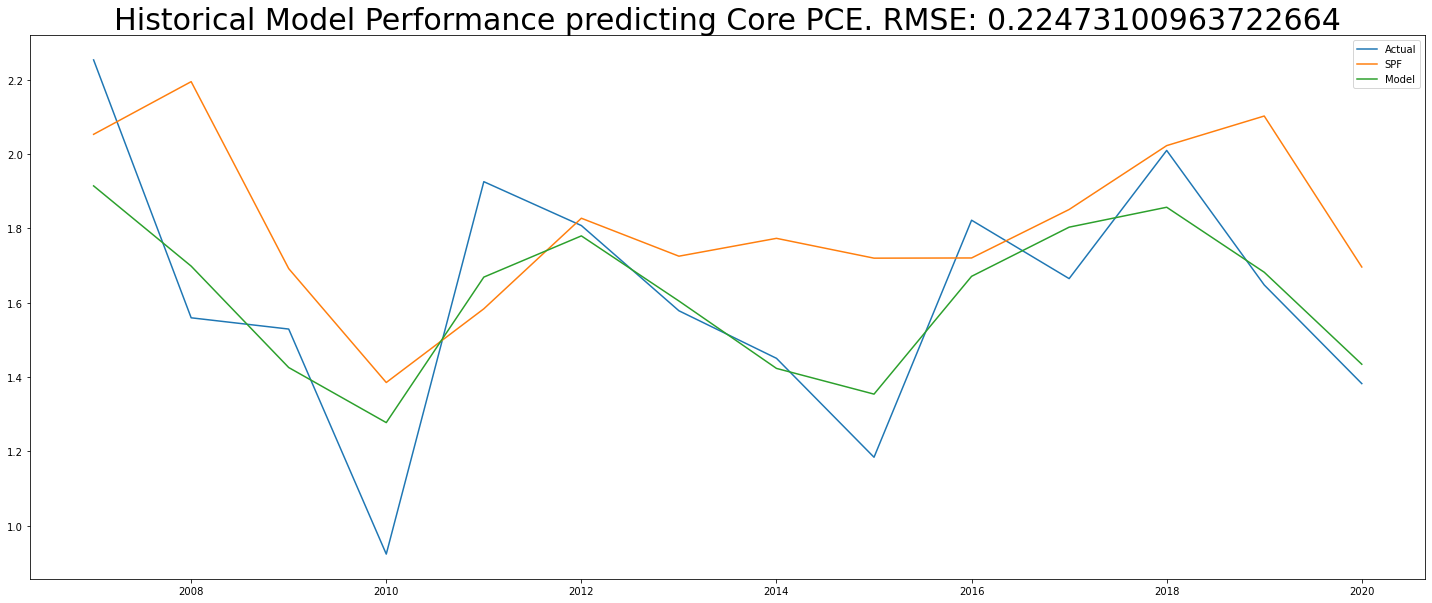

In [402]:
grouped = rf.annual_performance("Core PCE")

In [404]:
grouped

,Actual,SPF,Model
Year,,,
2007,2.253174,2.052968,1.914242
2008,1.559324,2.194670,1.698364
2009,1.529039,1.691660,1.425522
2010,0.923599,1.385253,1.277368
2011,1.925557,1.583512,1.668797
2012,1.807526,1.827190,1.779704
2013,1.578237,1.725095,1.604514
2014,1.450287,1.773117,1.423176
2015,1.184167,1.719787,1.353994


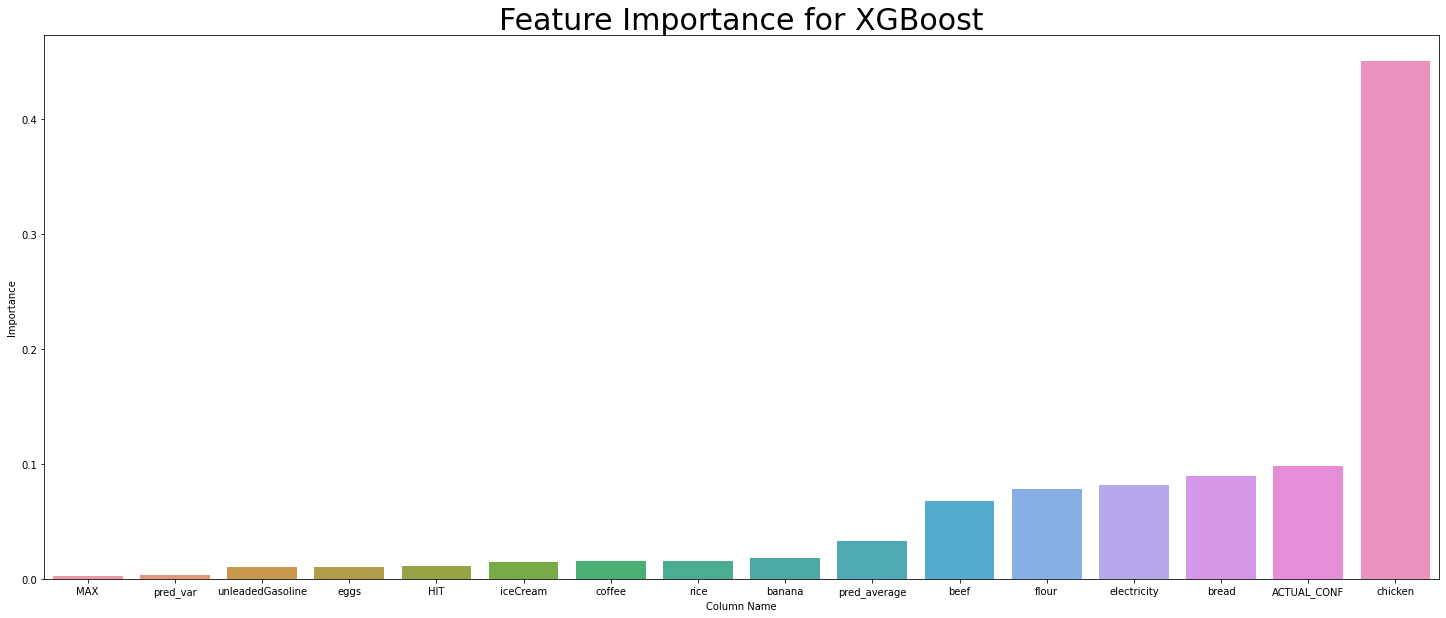

In [62]:
xgb = XGBRegressor(verbosity=0).fit(X_train, Y_train)
fig,axs = plt.subplots(1,1,figsize=(25,10))
sorted_scores = xgb.feature_importances_.argsort()
sns.barplot(x=X_train.columns[sorted_scores],y=xgb.feature_importances_[sorted_scores])
plt.xlabel("Column Name")
plt.ylabel("Importance")
plt.title("Feature Importance for XGBoost",size=30);

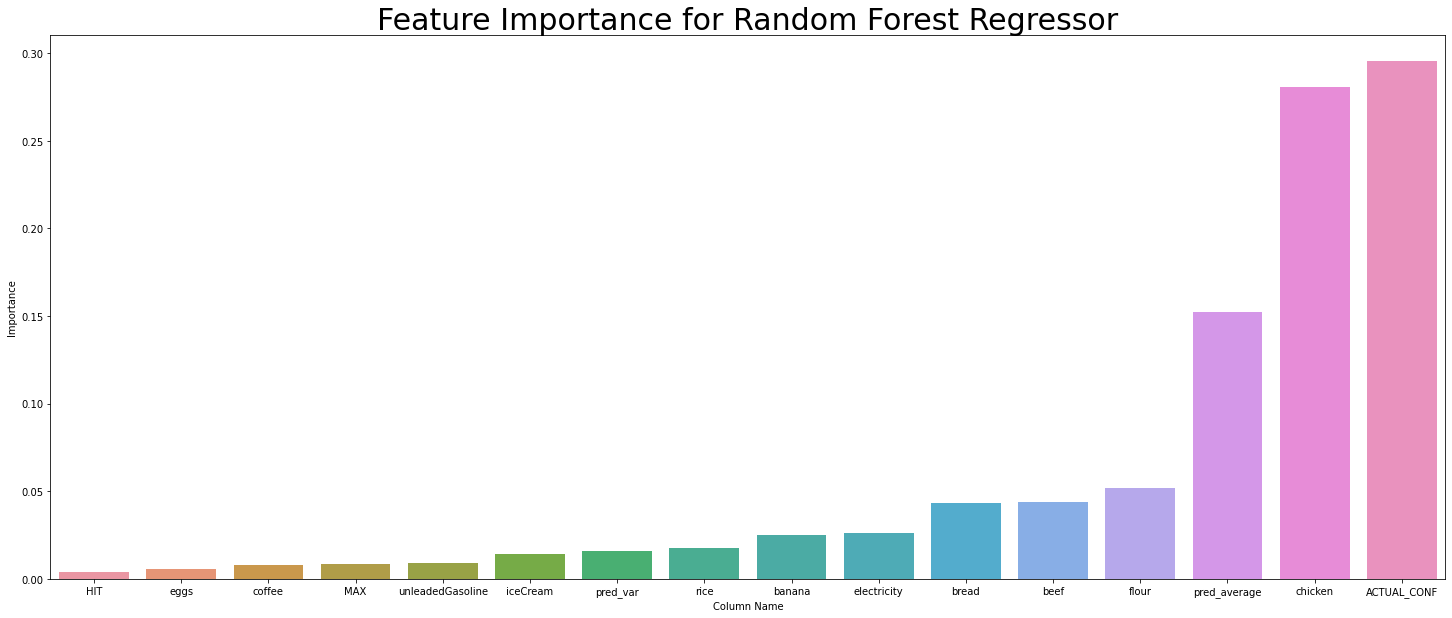

In [60]:
randomforest = RandomForestRegressor().fit(X_train, Y_train)
fig,axs = plt.subplots(1,1,figsize=(25,10))
sorted_scores = randomforest.feature_importances_.argsort()
sns.barplot(x=X_train.columns[sorted_scores],y=randomforest.feature_importances_[sorted_scores])
plt.xlabel("Column Name")
plt.ylabel("Importance")
plt.title("Feature Importance for Random Forest Regressor",size=30);

In [54]:
xgboost.best_models = {'Unemployment': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0),
 'RealGDP': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0),
 'Core CPI': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=140, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0),
 'Core PCE': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)}

In [12]:
xgboost_parameters = {'max_depth':np.arange(2,10),'n_estimators': np.arange(60,200,40),"learning_rate":[0.01,0.05,0.1]}

In [13]:
xgboost.perform_gridsearch(xgboost_parameters)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [56]:
xgboost.optimized=True
xgboost.store_scores()

In [57]:
xgboost.rmse_scores

[0.6871500325214561,
 0.43316816574009354,
 0.39824419749116546,
 0.3210065767781438]

In [58]:
xgboost.optimized_rmse_scores

[0.6742677863500751,
 0.42378448833869503,
 0.39885080082601687,
 0.40314091915689343]

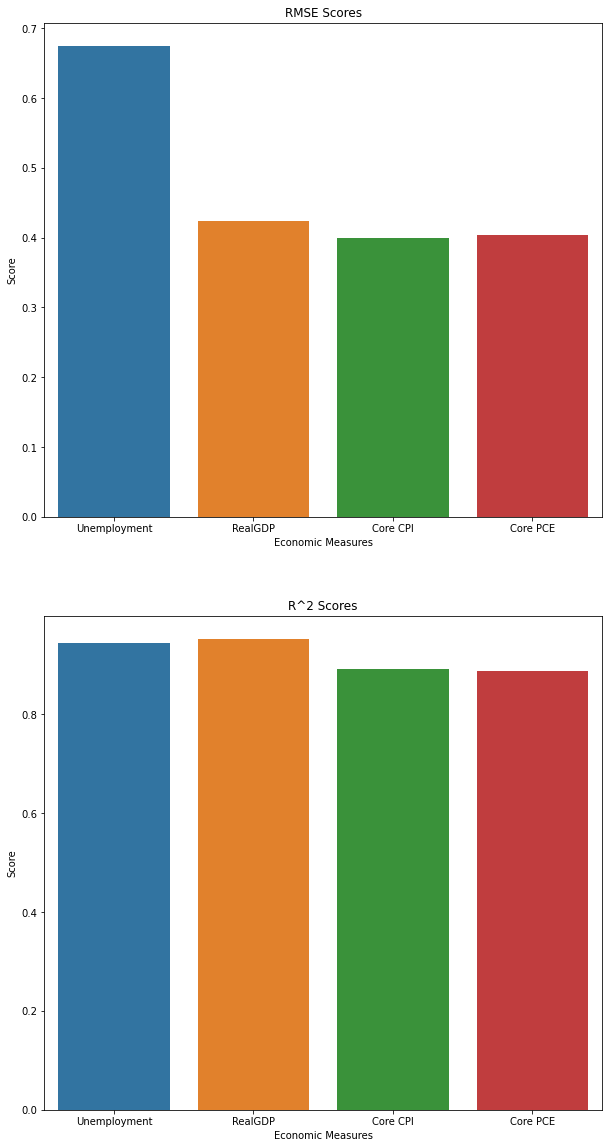

In [37]:
xgboost.plot_scores()

In [65]:
xgboost.optimized

True

In [66]:
xg_scores = xgboost.create_results()

In [59]:
RF = RegressionModel("Random Forest" ,RandomForestRegressor())

In [45]:
RF_params = {"n_estimators":np.arange(100,300,20)}

In [46]:
RF.perform_gridsearch(RF_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [60]:
RF.best_models = {'Unemployment': RandomForestRegressor(n_estimators=180),
 'RealGDP': RandomForestRegressor(n_estimators=160),
 'Core CPI': RandomForestRegressor(),
 'Core PCE': RandomForestRegressor(n_estimators=120)}

In [61]:
RF.best_models

{'Unemployment': RandomForestRegressor(n_estimators=180),
 'RealGDP': RandomForestRegressor(n_estimators=160),
 'Core CPI': RandomForestRegressor(),
 'Core PCE': RandomForestRegressor(n_estimators=120)}

In [62]:
RF.optimized=True
RF.store_scores()

In [63]:
RF.rmse_scores

[0.7065132210519138,
 0.4157836682672575,
 0.34028788176224795,
 0.40485490317099837]

In [64]:
RF.optimized_rmse_scores

[0.7094118600284802,
 0.41713586057771124,
 0.34741118690012224,
 0.3952660596084598]

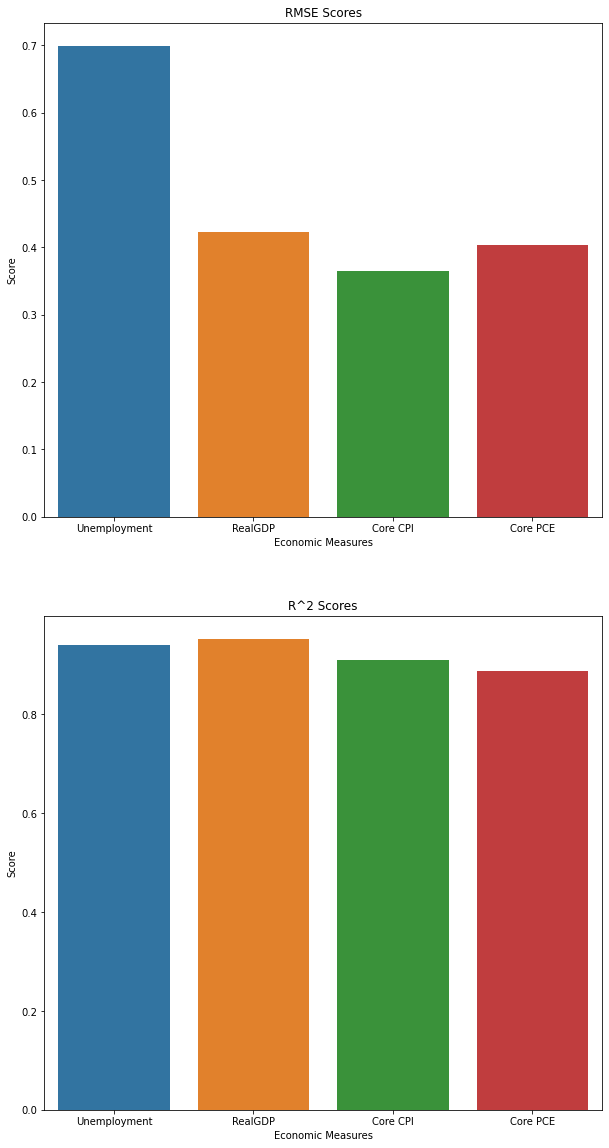

In [43]:
RF.plot_scores()

In [ ]:
RF.get_predictions("Unemployment")

In [67]:
RF.optimized

True

In [68]:
rf_scores = RF.create_results()

In [ ]:
lm  = RegressionModel("Linear Regression", LinearRegression())

In [ ]:
lm_scores = lm.create_results()

In [ ]:
lm.plot_scores()

In [ ]:
neighbors = RegressionModel("KNeigborsRegressor",KNeighborsRegressor())

In [ ]:
neighbors.plot_scores()

In [ ]:
neighbor_scores = neighbors.create_results()

In [69]:
model_predictions = pd.concat([xg_scores,rf_scores],axis=1)#,lm_scores,neighbor_scores],axis=1)

In [70]:
model_predictions

,XGBoost Unemployment,XGBoost RealGDP,XGBoost Core CPI,XGBoost Core PCE,Random Forest Unemployment,Random Forest RealGDP,Random Forest Core CPI,Random Forest Core PCE
0,0.024529,2.525367,2.284678,1.277267,0.000000,2.690666,2.275708,1.246261
1,3.809880,4.161139,2.084491,1.495712,3.874306,4.249021,2.174324,1.351786
2,3.915925,4.266360,2.059632,1.563071,3.712870,4.158768,1.961115,1.640270
3,8.112351,0.977842,2.211206,1.715864,8.108333,0.355206,2.221205,1.722364
4,4.358871,4.604209,2.228309,1.908844,4.350000,4.530313,2.218232,1.703876
...,...,...,...,...,...,...,...,...
2665,NaN,2.695229,NaN,NaN,NaN,2.913138,NaN,NaN
2666,NaN,2.509414,NaN,NaN,NaN,2.639555,NaN,NaN
2667,NaN,4.217857,NaN,NaN,NaN,4.127480,NaN,NaN
2668,NaN,2.411485,NaN,NaN,NaN,2.402891,NaN,NaN


In [71]:
t = val.loc[:,["INDICATOR","actual"]]
initial = pd.DataFrame([])
for measure in xgboost.measures:
    temp = t[t["INDICATOR"]==measure]
    temp.rename(columns={"actual":measure + " actual","INDICATOR":measure},inplace=True)
    temp.reset_index(inplace=True)
    initial = pd.concat([initial,temp],axis=1)
initial.drop(columns = ['index'],inplace=True)


C:\Users\Bear\anaconda3\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [72]:
final = pd.concat([initial,model_predictions],axis=1)

In [73]:
final

,Unemployment,Unemployment actual,RealGDP,RealGDP actual,Core CPI,Core CPI actual,Core PCE,Core PCE actual,XGBoost Unemployment,XGBoost RealGDP,XGBoost Core CPI,XGBoost Core PCE,Random Forest Unemployment,Random Forest RealGDP,Random Forest Core CPI,Random Forest Core PCE
0,Unemployment,0.000000,RealGDP,2.99646,Core CPI,2.290573,Core PCE,1.184167,0.024529,2.525367,2.284678,1.277267,0.000000,2.690666,2.275708,1.246261
1,Unemployment,3.891667,RealGDP,4.44722,Core CPI,2.174324,Core PCE,1.184167,3.809880,4.161139,2.084491,1.495712,3.874306,4.249021,2.174324,1.351786
2,Unemployment,3.683333,RealGDP,4.75324,Core CPI,2.174324,Core PCE,1.647664,3.915925,4.266360,2.059632,1.563071,3.712870,4.158768,1.961115,1.640270
3,Unemployment,8.108333,RealGDP,2.99646,Core CPI,2.290573,Core PCE,1.664742,8.112351,0.977842,2.211206,1.715864,8.108333,0.355206,2.221205,1.722364
4,Unemployment,4.350000,RealGDP,4.75324,Core CPI,2.290573,Core PCE,1.559324,4.358871,4.604209,2.228309,1.908844,4.350000,4.530313,2.218232,1.703876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,NaN,NaN,RealGDP,2.68428,NaN,NaN,NaN,NaN,NaN,2.695229,NaN,NaN,NaN,2.913138,NaN,NaN
2666,NaN,NaN,RealGDP,3.07551,NaN,NaN,NaN,NaN,NaN,2.509414,NaN,NaN,NaN,2.639555,NaN,NaN
2667,NaN,NaN,RealGDP,4.12748,NaN,NaN,NaN,NaN,NaN,4.217857,NaN,NaN,NaN,4.127480,NaN,NaN
2668,NaN,NaN,RealGDP,2.56377,NaN,NaN,NaN,NaN,NaN,2.411485,NaN,NaN,NaN,2.402891,NaN,NaN


In [74]:
final.to_csv("../models/results_post_gridsearch.csv",index=False)